
# (a) Download the “.csv” file for the red wines in the “Wine Quality” dataset.

In [55]:
import pandas as pd
# Load the csv file into a pandas DataFrame using the correct separator
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# (b) Split the dataset into train, validation, and test sets. You can use scikit-learn’s train test split function

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np
# Seperate the target variable (y) from the features (X)
y = wine_data["quality"]
X = wine_data.drop("quality", axis=1)

# split the datatset into training, validation and test sets, 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# (c) Write a program for training a simple linear regression model with sum-of-squares error function using the closed-form solution (do not use a built-in function).

In [57]:
def add_bias_term(X):
    """
    Add a bias term to the input matrix X
    """
    # Add a column of ones to the input matrix X
    return np.column_stack((np.ones(X.shape[0]), X))

def closed_form(X, y):
    """
    Compute the optimal weights using the closed form solution
    """
    # Compute the optimal weights using the closed form solution
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict(X, weights):
    """
    Predict the target variable using the input features and weights
    """
    # Predict the target variable using the input features and weights
    return X @ weights

def root_mean_squared_error(y_true, y_pred):
    """
    Compute the root mean squared error
    """
    # Compute the root mean squared error
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def sum_of_squared_errors(y_true, y_pred):
    """
    Compute the sum of squared errors
    """
    # Compute the sum of squared errors
    return np.sum((y_true - y_pred) ** 2)


In [58]:
import numpy as np

# Add a column of ones to all of the feature matrices to account for the bias term
X_train = add_bias_term(X_train)
X_val = add_bias_term(X_val)
X_test = add_bias_term(X_test)

# Calculate the weights using the closed-form solution
w = closed_form(X_train, y_train)

# Calculate the predictions on the validation set
y_val_pred = predict(X_val, w)

# Calculate the sum-of-squares error
error = sum_of_squared_errors(y_val, y_val_pred)

print("Sum-of-squares error:", error)


Sum-of-squares error: 97.52071922094575


# (d) For the train data, generate a plot of the actual target values vs predicted target values. How do we interpret this plot?

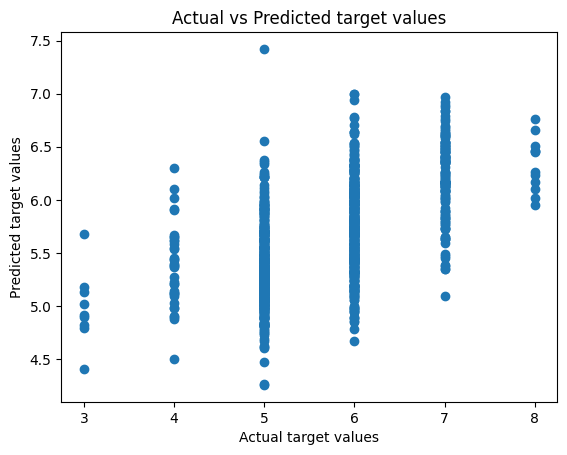

In [59]:
# For the train data, generate a plot of the actual target values vs 
# predicted target values. How do we interpret this plot?

import matplotlib.pyplot as plt

# Calculate the predictions on the training set
y_train_pred = predict(X_train, w)

# Generate a plot of the actual target values vs predicted target values

plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title("Actual vs Predicted target values")
plt.show()


The plot shows how well the model is able to predict the target values.
Ideally, the predicted target values should be close to the actual target values.
If the model is good, the points should be close to a straight line with a slope of 1.
The plot can be used to identify patterns in the predictions and to evaluate the performance of the model.

# (e) Report the root-mean-square on the train and test sets.

In [60]:
# Calculate the predictions on the test set
y_test_pred = predict(X_test, w)

# Calculate the root-mean-square error on the training set
rmse_train = root_mean_squared_error(y_train, y_train_pred)

# Calculate the root-mean-square error on the test set
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("Root-mean-square error on the training set:", rmse_train)
print("Root-mean-square error on the test set:", rmse_test)

Root-mean-square error on the training set: 0.6486806989670352
Root-mean-square error on the test set: 0.6450840357985688


# (f) Implement the least-mean-squares (LMS) algorithm for linear regression with random initialization of w<sup>(0)</sup> and stepsize(s) of your choice (you can experiment with that)

In [61]:
# Initialize the weights randomly
np.random.seed(42)
w = np.random.randn(X_train.shape[1])

# Set the stepsize
s = 0.0001

# Set the number of iterations
n_iterations = 1000

# Implement the LMS algorithm
for i in range(n_iterations):
    for j in range(X_train.shape[0]):
        # Calculate the prediction error and update the weights
        error = y_train.iloc[j] - X_train[j] @ w
        w = w + s * X_train[j] * error

# Calculate the predictions on the validation set
y_val_pred = predict(X_val, w)

# (g) Report the root-mean-square on the train and test sets.

In [62]:
# Calculate the predictions on the training set
y_train_pred = predict(X_train, w)

# Calculate the predictions on the test set
y_test_pred = predict(X_test, w)
# Calculate the root-mean-square error on the training set
rmse_train = root_mean_squared_error(y_train, y_train_pred)

# Calculate the root-mean-square error on the test set
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("Root-mean-square error on the training set:", rmse_train)
print("Root-mean-square error on the test set:", rmse_test)

Root-mean-square error on the training set: 0.6646535377897604
Root-mean-square error on the test set: 0.6623679413703923
